In [ ]:
import os
os.makedirs("results/qc_plots", exist_ok=True)
os.makedirs("scripts", exist_ok=True)

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
import rpy2.robjects as ro

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [ ]:
pip install pydeseq2

ERROR: Operation cancelled by user


In [ ]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [ ]:
ro.r('''
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("apeglm")
''')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpoXPOET/downloaded_packages’

'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

































	‘/tmp/RtmpoXPOET/downloaded_packages’




Update all/some/none? [a/s/n]: a








	‘/tmp/RtmpoXPOET/downloaded_packages’



In [ ]:
# Εγκατάσταση DESeq2 από Bioconductor
ro.r('BiocManager::install("DESeq2")')

'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
















	‘/tmp/RtmpoXPOET/downloaded_packages’



In [ ]:
ro.r('install.packages(c("ggplot2","pheatmap", "tidyr", "matrixStats"))')

(as ‘lib’ is unspecified)






	‘/tmp/RtmpoXPOET/downloaded_packages’



In [ ]:

ro.r('''
# === Βιβλιοθήκες ===
library(DESeq2)
library(apeglm)
library(ggplot2)
library(matrixStats)
library(tidyr)

# === Ανάγνωση δεδομένων ===
counts <- read.csv("scripts/counts_alligned.csv", row.names = 1)
meta <- read.csv("scripts/meta_filtered.csv", row.names = 1)
meta <- meta[colnames(counts), , drop = FALSE]

# === Δημιουργία DESeq2 dataset ===
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = meta,
                              design = ~ condition)

# === Filtering Lowly Expressed Genes === main edo
#keep <- rowSums(counts(dds)) > 10
#dds <- dds[keep, ]
#keep <- rowSums(counts(dds) > 2) >= 5
#dds <- dds[keep, ]
#keep <- rowMeans(counts(dds)) >= 2
#dds <- dds[keep, ]
#group1 <- colnames(dds)[dds$condition == "none"]
#group2 <- colnames(dds)[dds$condition == "hypertofic cadiomyopathy"]
#keep <- rowSums(counts(dds)[, group1]) > 0 & rowSums(counts(dds)[, group2]) > 0
#dds <- dds[keep, ]


keep <- rowSums(counts(dds)) > 10
dds <- dds[keep, ]

dds <- estimateSizeFactors(dds, type = "poscounts")

keep <- rowSums(counts(dds) > 2) >= 5
dds <- dds[keep, ]

keep <- rowMeans(counts(dds)) >= 5
dds <- dds[keep, ]

# === QC: VST για plots ===
vsd <- varianceStabilizingTransformation(dds, blind = TRUE)

# --- Boxplot ---
vst_df <- as.data.frame(assay(vsd))
vst_df$gene <- rownames(vst_df)
vst_long <- pivot_longer(vst_df, cols = -gene, names_to = "sample", values_to = "expression")

p1 <- ggplot(vst_long, aes(x = sample, y = expression)) +
  geom_boxplot(outlier.size = 0.3) +
  labs(title = "Boxplot of VST-transformed counts", x = "Sample", y = "Expression (VST)") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("results/qc_plots/boxplot.pdf", plot = p1, width = 10, height = 6)

# --- Mean-SD Plot ---
gene_means <- rowMeans(assay(vsd))
gene_sds <- rowSds(assay(vsd))
mean_sd_df <- data.frame(mean = gene_means, sd = gene_sds)

p2 <- ggplot(mean_sd_df, aes(x = mean, y = sd)) +
  geom_point(alpha = 0.3, size = 1) +
  labs(title = "Mean–SD Plot (VST-transformed counts)", x = "Mean Expression", y = "Standard Deviation") +
  theme_bw()

ggsave("results/qc_plots/mean_sd_plot.pdf", plot = p2, width = 8, height = 6)

# --- PCA Plot ---
p3 <- plotPCA(vsd, intgroup = "condition") +
  ggtitle("PCA of VST-transformed RNA-seq data")

ggsave("results/qc_plots/pca_plot.pdf", plot = p3, width = 8, height = 6)

# === Κανονικοποίηση για sparse data ===
dds <- estimateSizeFactors(dds, type = "poscounts")

# === Εκτέλεση DESeq2 ===
dds <- DESeq(dds)

# === Shrinkage των log fold changes ===
res <- results(dds)
resLFC <- lfcShrink(dds, coef=2, type="apeglm")

# === Φιλτράρισμα σημαντικών γονιδίων ===
resSig <- subset(resLFC, padj < 0.05 & abs(log2FoldChange) > 0.5)

# === Αποθήκευση ===
write.csv(as.data.frame(resLFC), file = "results/deseq2_results.csv")
write.csv(as.data.frame(resSig), file = "results/deseq2_significant.csv")
''')



  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]


  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]





  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior dis

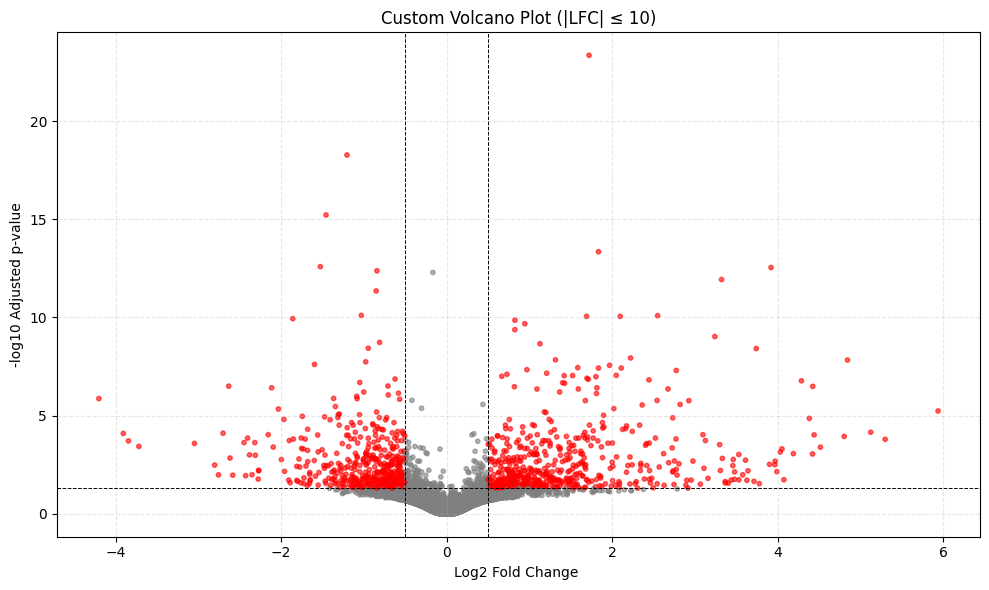

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("scripts", exist_ok=True)

# --- Φόρτωση αποτελεσμάτων με shrinkage ---
res_df = pd.read_csv("results/deseq2_results.csv", index_col=0)
res_df = res_df.dropna(subset=["padj", "log2FoldChange"])

# --- Φιλτράρισμα extreme values για καθαρό plot ---
res_df = res_df[(res_df["log2FoldChange"] >= -6)  & (res_df["log2FoldChange"] <= 6)]
res_df["significant"] = (res_df["padj"] < 0.05) & (res_df["log2FoldChange"].abs() > 0.5)


# --- Volcano Plot --- #
plt.figure(figsize=(10, 6))
plt.scatter(res_df["log2FoldChange"], -np.log10(res_df["padj"]),
            c=res_df["significant"].map({True: "red", False: "gray"}),
            alpha=0.6, s=10)

# --- Γραμμές κατωφλίου ---
plt.axhline(-np.log10(0.05), color='black', linestyle='--', linewidth=0.7)
plt.axvline(-0.5, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0.5, color='black', linestyle='--', linewidth=0.7)

plt.xlabel("Log2 Fold Change ")
plt.ylabel("-log10 Adjusted p-value")
plt.title("Custom Volcano Plot (|LFC| ≤ 10)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Ορισμός thresholds
padj_thresh = 0.05
logfc_thresh = 1

significant = res_df[res_df['padj'] < padj_thresh]

significant = res_df[res_df['padj'] < padj_thresh]
upregulated = significant[significant['log2FoldChange'] > logfc_thresh]
downregulated = significant[significant['log2FoldChange'] < -logfc_thresh]

In [ ]:
# Εκτύπωση σημαντικών γονιδίων
print("Upregulated genes:")
print(upregulated[['log2FoldChange', 'padj']].head(10))

print("\nDownregulated genes:")
print(downregulated[['log2FoldChange', 'padj']].head())

Upregulated genes:
                                        log2FoldChange          padj
ENST00000469054.1|OTTHUMT00000036905.1        1.562576  3.776325e-03
ENST00000714547.1                             3.305582  6.232443e-03
ENST00000375111.7|OTTHUMT00000007675.1        2.542240  2.962403e-02
ENST00000695747.1|ENST00000695747             1.325154  3.753447e-02
ENST00000695751.1                             1.520621  5.160183e-03
ENST00000361729.3|OTTHUMT00000008885.2        1.442154  4.166602e-02
ENST00000475306.1|OTTHUMT00000008385.1        1.206157  2.325610e-02
ENST00000270879.9|OTTHUMT00000015667.1        2.547752  8.133881e-11
ENST00000373921.8|OTTHUMT00000011148.2        2.819322  2.702344e-06
ENST00000492877.1|OTTHUMT00000011150.1        1.280276  4.140178e-02

Downregulated genes:
                                        log2FoldChange          padj
ENST00000321751.9|OTTHUMT00000008277.1       -1.387189  7.466303e-03
ENST00000463312.1|OTTHUMT00000091255.1       -2.632981  3.1511